# <center><font color="green"> https://bit.ly/ptpjb-2021-13</font></center>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/ptpjb-2021-13)

# <center><font color="blue">13 - Introduction to Neural network & Deep Learning</font></center>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>Fathu Rahman - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a></center>

# <center><font color="blue"> Outline - Introduction to Deep Learning</font></center>

* Pendahuluan Neural Network
* Training Neural Network
* Kelebihan dan Kekurangan
* Studi Kasus
* TensorBoard
* Hyper-parameter Tuning
* Latihan

# <center><font color="blue">Pendahuluan Neural Network </font></center>

<img src="images/neural network 2.jpg"  style="width: 500px;"/>

image source: https://fkmtfindonesia.or.id/artificial-neural-network/

## Penerapan Neural Network
<br>
<center><video align="center" controls src="videos/neural_network_in_life.MP4"/></center>

source: https://www.youtube.com/watch?v=me3QEYPsFWE

### Reface App Manfaatkan Deep Tech AI
https://aqi.co.id/blog/yang-sedang-viral-reface-app-swap-wajah-dengan-teknologi-ai
<br><br>
<center><video align="center" controls src="videos/Reface App.mp4" width="700" ><center/>

<img alt="" src="images/Sejarah_ML_AI.jpg" />

# History:

## Sejarah Beberapa Metode di Machine Learning:

* Bayesian		: 1763 Thomas Bayes, Statisticians
* Regresi		: Abad 19 (~18XX), Francis Galton (biologist)
* Decision Tree	: 1959, William Belson, biologist  (popular oleh R. Quinlan 80-an ID3 & CART oleh )
* Perceptron		: 1962, Frank Rosenblatt, psychologist
* SVM		: 1963, Vapnik, Mathematics and Statistics.
* Neural network	: 1974, Werbos (backprop), 1990 Hecht-Nielsen (MLP)(setelah perceptron)
* Semi-Supervised	: 1965 Scruder, tapi popular 2008 Zhu (comp scientist)
* Ensemble		: 1979, Dasarathy, 
* Deep learning	: ...

## Sejarah Deep Learning:

* Ketika ML (SVM) sedang populer di tahun 2010, beberapa peneliti tetap mendalami NN, diantaranya nama-nama tenar seperti&nbsp;Geoffrey Hinton di the University of Toronto, dan Yann LeCun di New York University.
* Deep Learning dengan GPU dimulai di tahun 2011 (Dan Ciresan dari&nbsp; IDSIA-Swiss)
* Namun di 2012 baru terkenal karena permasalahan klasifikasi ImageNet (~1,4 juta image dikategorikan ke 1000 kelas) mampu diselesaikan oleh Hinton. Awalnya akurasinya &#39;hanya&#39; ~74% (2011), lalu ~83(2012), dan di anggap telah solved di 2015 dengan akurasi ~96% (Deep Convolutional Neural Network - convnets).
* Sejak itu&nbsp;convnets menjadi model dasar computer vision.
* Di Kaggle (2016-2017) ada trend untuk data terstruktur biasanya diselesaikan dengan Gradient Boosting (e.g. XGBoost) dan data tidak terstruktur dengan DL (e.g. Keras).

<p>Theory Deep Learning sebenarnya sudah cukup lama ada (dibahas):</p>

<ul>
	<li>convolutional neural networks dan backpropagation &mdash; 1989</li>
	<li>The Long Short-Term Memory ( LSTM ) algorithm (timeseries DL)&nbsp;&mdash;&nbsp;1997</li>
</ul>

<p>Lalu mengapa baru tenar di 2012?</p>

<ul>
	<li>Hardware (terutama GPU)</li>
	<li>Dataset (Big Data)</li>
	<li>Perkembangan Algoritma terbaru : Better activation functions, weight-initialization schemes, optimization schemes (e.g.Adam W)</li>
</ul>

<big><strong>Tapi apa sebenarnya Deep Learning?</strong></big>

# Deep Learning?

<img alt="" src="images/5_DeepLearning.png" />

<big>Yang menjadi pembeda utama DL dengan ML adalah DL &quot;<em>Learning representations from data</em>&quot;. Misal Word Embedding (bandingkan dengan VSM di Machine Learning).<br />
Makna &quot;Deep&quot; di DL sendiri bermakna &quot;successive layers of representations&quot; biasa juga disebut sebagai&nbsp;<em>layered representations learning</em> atau <em>hierarchical representations learning</em>.</big>

# First thing first

 <img alt="" src="images/why_DL.png" />
 
* Seringnya DL butuh data yang besar untuk memperoleh performa (akurasi) yang baik.
* Later-on "Transfer Learning" diperkenalkan untuk mengatasi hal ini.

## Neural Network

<img src="images/intro_nn.JPG"  style="width: 800px;" />

<img alt="" src="images/6_JST.JPG" style="height:400px; width:706px" />

### Single Perceptron untuk Klasifikasi Binari
Misalkan masalah klasifikasi binari yang terdiri dari dua kelas yaitu kelas negatif (-1) dan kelas positif (1)

<img src="images/single_perceptron.JPG"/>

- Pada single perceptron, kombinasi linear antara variabel sebanyak $m$ dengan masing-masing bobotnya dijadikan sebagai input.

<center>$z=w_0+x_1w_1+x_2w_2+...+x_mw_m=\bf{W^TX}$</center>
<br>

- Kemudian dengan menggunakan fungsi batas, hasil kombinasi linear tersebut akan ditentukan sebagai kelas negatif (-1) atau kelas positif (1) berdasarkan nilai batas yang ditentukan.

<img src="images/binary_function.JPG" width="200"/>
<img src="images/single_perceptron2.JPG" width="500"/>

- Fungsi batas tersebut biasanya disebut fungsi aktivasi

# Fungsi Aktivasi

Fungsi aktivasi adalah fungsi yang memutuskan apakah suatu neuron harus diaktifkan atau tidak berdasarkan hasil perhitungan kombinasi linear antara variabel input dengan masing-masing bobotnya. Selain itu fungsi aktivasi bisa berfungsi untuk merubah kombinasi linear tersebut menjadi output yang non linear

- Terdapat beberapa *activation function*, di antaranya sebagai berikut:

<ul>
	<li><img alt="" src="images/act_func.png" style="width: 760px; height: 206px;" /></li>
</ul>

<p><img alt="" src="images/6_JST_Actv.png" style="width: 756px; height: 625px;" /></p>

<h1 > Contoh Fungsi tanh memetakan [-Inf, Inf] ke [-1, 1]</h1>

<p><img alt="" src="images/tanh_act.gif" style="width: 800px; height: 317px;" /></p>

<h1 >Contoh 2: Fungsi Aktivasi Sigmoid yang bisa digunakan untuk menginat dan melupakan (mantan? :) )</h1>

<ul>
	<li>Fungsi sigmoid mirip dengan tanh, namun intervalnya adalah [0, 1].</li>
	<li>Semakin dekat ke 0 ==&gt; melupakan (forget): informasi tidak relevan.</li>
	<li>Semakin dekat ke 1 ==&gt; mengingat: informasi relevan/penting.</li>
	<li><img alt="" src="images/sigmoid.gif" style="width: 800px; height: 317px;" /></li>
</ul>

# memangnya Tanpa fungsi aktivasi apa yang akan terjadi?

* Tanpa fungsi aktivasi, weights bisa membesar tak berbatas ketika iterasinya berjalan

<p><img alt="" src="images/tanpa_tanh.gif" style="width: 800px; height: 106px;" /></p>

# Dengan Fungsi Aktivasi, nilai weights selalu terbatas (misal) di -1 dan 1, namun tingkat kepentingan weight tetap terjaga.

* Perhatikan nilai weight yang pertama
<img alt="" src="images/dgn_tanh.gif" style="width: 800px; height: 106px;" />

# <center><font color="blue">Training Neural Network </font></center>

<img src="images/cara_kerja_nn.JPG" />


## Contoh sistem kerja Neural Network

<center><video align="center" controls src="videos/neural network.mp4" width="560" height="315"/></center>

link: https://youtu.be/o20mBWPHGEw

<h1 id="The-flow-of-the-Computation">The flow of the Computation</h1>

<ul>
	<li><img alt="" src="images/VG_1.gif" style="width: 250px; height: 270px;" /></li>
	<li><img alt="" src="images/VG_2.gif" style="width: 250px; height: 270px;" /></li>
</ul>


<h2 id="Toy-Data-Example-Neural-Network-(Back-Propagation)">Toy Data Example Neural Network (Back Propagation)</h2>

<p><img alt="" src="images/NN-BP_step_1.png" style="width: 600px; height: 358px;" /></p>


<img alt="" src="images/NN-BP_step_2.png" style="width: 600px; height: 348px;" />

<p><img alt="" src="images/NN-BP_step_3.png" style="width: 600px; height: 313px;" /></p>


<p><img alt="" src="images/NN-BP_step_4.png" style="width: 600px; height: 305px;" /></p>


<p><img alt="" src="images/NN-BP_step_5.png" style="width: 600px; height: 305px;" /></p>


<p><img alt="" src="images/Loss_function_neural_network_deep_learning.png" /></p>

# Memilih Fungsi Aktivasi dan Fungsi Loss

<img alt="" src="images/memilih_loss_dan_activation.png" style="width: 600px; height: 368px;" />

<p><big><strong>Binary Cross Entropy</strong></big></p>

<p><img alt="" src="images/binary_cross_entropy.png" style="width: 600px; height: 173px;" /></p>

<p><big><strong>Minimum Squared Error</strong></big></p>

<p><img alt="" src="images/mse.png" style="width: 300px; height: 106px;" /></p>

<p><img alt="" src="images/mse_mean.png" style="width: 600px; height: 323px;" /></p>


<table border="1" cellpadding="1" cellspacing="1" style="width: 500px">
	<tbody>
		<tr>
			<td><img alt="" src="images/contours_evaluation_optimizers.gif" /></td>
			<td><img alt="" src="images/saddle_point_evaluation_optimizers.gif" /></td>
		</tr>
	</tbody>
</table>

Optimizer : 
<a href="http://ruder.io/optimizing-gradient-descent/" target="_blank">http://ruder.io/optimizing-gradient-descent/&nbsp;</a>


<h2 id="Loss-function-and-Error">Loss function and Error</h2>

<p><img alt="" src="images/low-high-bias-variance.png" style="width: 600px; height: 244px;" /></p>


# Loss, Optimizer, & metric

<ol>
	<li><strong>Loss function (objective function)</strong> &mdash; fungsi yang akan di minimize. Hasilnya merepresentasikan tingkat sukses pada setiap iterasi.<br />
	<a href="https://keras.io/losses/" target="_blank">https://keras.io/losses/&nbsp;</a></li>
	<li><strong>Optimizer&nbsp;</strong>&mdash; Berfungsi untuk menentukan bagaimana (weights) di network akan di update berdasarkan loss-functionnya. (e.g. variasi dari SGD)<br />
	<a href="https://keras.io/optimizers/" target="_blank">https://keras.io/optimizers/</a></li>
	<li><strong>Metrics&nbsp;</strong>&mdash; Satuan evaluasi<br />
	<a href="https://keras.io/metrics/" target="_blank">https://keras.io/metrics/</a></li>
</ol>



<img alt="" src="images/NN-BP_step_6.png" style="width: 600px; height: 304px;" />

<p><img alt="" src="images/NN-BP_step_7.png" style="width: 600px; height: 305px;" /></p>


<p><img alt="" src="images/NN-BP_step_8.png" style="width: 600px; height: 303px;" /></p>


<p><img alt="" src="images/NN-BP_step_9.png" style="width: 600px; height: 301px;" /></p>


## Multiclass ANN
<img alt="" src="images/Multiclass_ANN.png" style="width: 600px; height: 468px;" />

<p>Neural Network - Empirical Analysis Parameter di ANN</p>
<strong><a href="https://goo.gl/3rcnc9" target="_blank">https://goo.gl/3rcnc9</a></strong>


<p>Mengapa dengan fungsi linear bisa membentuk &quot;boundary&quot; yang melengkung (kurva)?</p>
<strong><a href="http://s.id/j6i" target="_blank">http://s.id/j6i</a></strong>

<p><img style="undefined: undefined;" src="images/6_tipe_NN.png" alt="" width="618" height="1050" /></p>

# <center><font color="blue">Kelebihan dan Kekurangan</font></center>
<img src="images/pros and cons.jpeg" style="width: 600px"/><br>
<img src="images/NN vs ML.jpeg" style="width: 800px"/><br>
<img src="images/NN vs ML 2.jpeg" style="width: 800px"/>


image source: 
- https://slidetodoc.com/neural-networks-and-support-vector-machines-outline-neural/
- https://dzone.com/articles/comparison-between-deep-learning-vs-machine-learni

# <center><font color="blue">Studi Kasus</font></center> 

- Sebagai ilustrasi, kita gunakan data konsumsi energi tiap rumah untuk membuat model neural network
- Data tersebut terdiri dari 504 baris dan 4 kolom, kolom tersebut di antaranya yaitu:
1. jumlah ruangan
2. jumlah penghuni
3. luas bangunan
4. banyaknya energi listrik yang digunakan dalam satuan KWh per bulan

<img src="images/data_energi.JPG"/>

- Data tersebut merupakan hasil modifikasi dari data boston housing (link: https://www.kaggle.com/c/boston-housing)
- Model neural network yang akan dibuat bertujuan untuk memprediksi kolom energi listrik berdasarkan kolom lainnya.

## Import Modul Standar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

## Import Data Konsumsi Energi
- Data konsumsi energi diimport menggunakan pandas
- karena format datanya csv maka untuk mengimportnya menggunakan `pd.read_csv()`
- setelah diimport dan simpan dalam variabel energi, kita coba lihat 5 data teratas menggunakan `energi.head()`

In [4]:
file_ = 'data/konsumsi_energi.csv'
try: # Running Locally
    energi = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/main/{file_}
    energi = pd.read_csv(file_)
energi.head(10)

,jumlah_ruangan,jumlah_penghuni,luas_bangunan,listrik
0,2,1,49.8,24.0
1,7,2,91.4,21.6
2,7,2,40.3,34.7
3,2,3,29.4,33.4
4,2,3,53.3,36.2
5,2,3,52.1,28.7
6,7,5,124.3,22.9
7,7,5,191.5,27.1
8,7,5,299.3,16.5
9,7,5,171.0,18.9


## Visualisasi Data

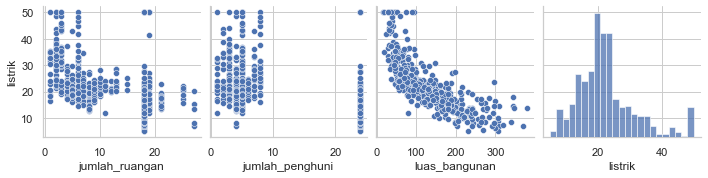

In [5]:
sns.pairplot(energi, y_vars='listrik')

- Dari hasil visualisasi data terlihat bahwa terdapat keanehan pada data.
- Hal tersebut dikarenakan data yang digunakan bukan data sebenarnya.
- Tetapi coba kita tetap gunakan sebagai contoh.

## Melihat Statistika Deskriptif dari Data
- Sebelum melakukan pembuatan model, sebaiknya dilakukan analisa terhadap statistika deskriptif dari data
- Dari statistika deskriptif tersebut, kita dapat meilhat range dari data dan ukuran pusat data

In [6]:
energi.describe()

,jumlah_ruangan,jumlah_penghuni,luas_bangunan,listrik
count,504.000000,504.000000,504.000000,504.000000
mean,10.750000,9.575397,126.859325,22.474008
std,6.914488,8.714506,71.355341,9.132927
min,1.000000,1.000000,17.300000,5.000000
25%,5.000000,4.000000,70.925000,16.950000
50%,9.000000,5.000000,113.950000,21.200000
75%,18.000000,24.000000,169.925000,25.000000
max,27.000000,24.000000,379.700000,50.000000


- Dari statistika deskriptif di atas terlihat perbedaan range antara jumlah_keluarga, jumlah_ruangan dengan luas_bangunan dan listrik
- Karena perbedaan range tersebut, nanti kita akan lakukan **feature scalling** menggunakan **MinMaxScaler** agar range dari seluruh data tersebut berada di antara 0 dan 1

## Menentukan variabel target dan variabel input
Karena tujuan kita adalah memprediksi kolom listrik berdasarkan kolom lainnya, maka:
- kita tetapkan kolom listrik sebagai variabel target (y) 
- dan kolom lainnya sebagai variabel input (X)

In [7]:
y = energi[['listrik']].values
X = energi.drop(columns=['listrik']).values

# Check the shape of training data
print(X.shape,y.shape)
print(type(y),type(X))

(504, 3) (504, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


- Perhatikan bahwa code di atas menggunakan `.values` saat menetapkan variabel y dan X
- Hal tersebut dilakukan untuk merubah tipe data dataframe menjadi numpy array
- Tensorflow sebenarnya dapat memproses tipe data dataframe, namun tipe data numpy array akan lebih cepat diproses

## Split Data
<img src="images/cross_validation.png">

- Split data dilakukan agar model yang telah dilatih dapat dievaluasi kemampuannya.
- Kita gunakan **train_test_split** dari modul **sklearn** untuk melakukan split data
- **train_test_split** tersebut melakukan split data dengan **stratified sampling**
- Kita juga akan melakukan **cross validation** menggunakan data train sehingga pastikan data train yang digunakan cukup besar.
- Pada contoh ini kita gunakan 80% data train dan 20% data test
- **random_state** ditetapkan berupa bilangan integer agar hasil split data yang dilakukan secara acak selalu sama

In [8]:
# Create training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Banyak data train:', len(X_train))
print('Banyak data test :', len(X_test))

Banyak data train: 403
Banyak data test : 101


## Feature Scalling

- Perbedaan range antara variabel-variabel yang digunakan akan menyulitkan proses pelatihan model neural network
- Selain itu range yang besar juga dapat menyebabkan suatu ketika nilai loss function sangat besar sehingga proses pelatihan model neural network tidak mencapai nilai minimum
- Oleh karena itu perlu dilakukan **feature scalling** menggunakan **MinMaxScaler** agar seluruh data memiliki range yang sama yaitu dari 0 sampai 1
- Rumus MinMaxScaler:
# <center> $x^*=\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

<img src="images/minmax.png" width="500"/>

- MinMaxScaler difit pada data train agar dapat digunakan kembali pada data test maupun data observasi baru
- MinMaxScaler diterapkan secara terpisah antara variabel target dan input karena ketika ingin memprediksi variabel target dengan data observasi baru, data tersebut hanya terdiri dari variabel input

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(X_train)
scaler2 = MinMaxScaler()
scaler2.fit(y_train)

X_train_scaled = scaler1.transform(X_train)
X_test_scaled = scaler1.transform(X_test)
y_train_scaled = scaler2.transform(y_train)
y_test_scaled = scaler2.transform(y_test)

## Neural Network Menggunakan Tensorflow dan Keras
- tensorflow: https://www.tensorflow.org/overview
- keras: https://keras.io/about/

# Instalasi Lokal GPU Support (TensorFlow-CUDA) untuk model Deep Learning. 

* Link ini akan membantu menyesuaikan versi CUDA dan CudNN yang tepat untuk semua versi TensorFlow.  Hati-hati!!!.... requirement CUDA dan CudNN berbeda antara Linux & Windows (Walau versi tensorflow-nya sama!!!).
* Berikut Versi Keras-TensorFlow yang bersesuaiannya: https://docs.floydhub.com/guides/environments/
Download Cuda dan CudNN yang bersesuaian (seringnya BUKAN versi terakhir) dari sini (need to register):
* https://developer.nvidia.com/rdp/cudnn-archive
* https://developer.nvidia.com/cuda-downloads

* Setelah install Cuda/Cudnn, jika compiler terinstall dengan baik, maka perintah **pip install --upgrade tensorflow-gpu** bisa digunakan di terminal/command prompt.

[Linux]:  https://www.tensorflow.org/install/source#tested_build_configurations 

[Windows]:  https://www.tensorflow.org/install/source_windows 

Untuk "PyTorch" cenderung lebih mudah: https://pytorch.org/get-started/locally/

# Google Colaboratory

* Free with GPU (& TPU) support (Max run ~ 10jam)
* Login dengan Username dan password Google
* Kunjungi https://colab.research.google.com
* New Python 3 Notebook, rename/save Notebook 
* Runtime>Change runtime type and select GPU as Hardware accelerator.

In [10]:
import warnings, matplotlib.pyplot as plt; warnings.simplefilter('ignore')
import pickle, numpy as np, tensorflow as tf, time, os, matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow import keras    
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

sns.set(style="darkgrid")
"Done"

'Done'

# Testing GPU

In [11]:
print("TensorFlow version = ", tf.__version__)
if tf.test.is_built_with_cuda():
    physical_devices = tf.config.list_physical_devices('GPU') 
    print("CUDA enabled TF, Num GPUs:", len(physical_devices), physical_devices) 
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

TensorFlow version =  2.6.0
CUDA enabled TF, Num GPUs: 1 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Struktur neural network di keras API
- **Sequential model**

Sequential model memungkinkan kita untuk membuat model layer demi layer secara berurutan. Untuk membuat variabel Sequential model dilakukan sebagai berikut:

`from keras.models import Sequential`<br>
`model = Sequential()`
- **Dense layer**

Dense layer membuat fully connected layer dengan neuron-neuron yang terhubung pada layer sebelumnya. Pada dense layer ini kita dapat menentukan berapa banyak neuron dan fungsi aktivasi apa yang digunakan. Sebagai contoh untuk menambahkan Dense layer dengan neuron sebanyak 32 dan fungsi aktivasi sigmoid pada Sequential model dilakukan sebagai berikut:

`model = Sequential()`<br>
`model.add(Dense(32, input_dim=3, activation='sigmoid'))`

input_dim berfungsi untuk menentukan banyaknya variabel input dan hanya ditentukan pada layer pertama.
- **Dropout layer**

Dropout layer adalah layer penting untuk mengurangi over-fitting dalam model neural network. Dropout layer akan mengurangi kompleksitas model neural network dengan mengurangi jumlah neuron secara acak sehingga hal ini dapat mencegah over-fitting. persentase jumlah neuron yang dikurangi dapat dilakukan dengan menentukan nilai dropout antara 0 sampai 1.

<img src="images/dropout.jpg" width="400"/>

image source: https://www.tech-quantum.com/implementing-drop-out-regularization-in-neural-networks/

Untuk melakukan dropout pada layer sebelumnya sebesar 20% dapat dilakukan sebagai berikut:

`model = Sequential()`<br>
`model.add(Dense(32, input_dim=3, activation='sigmoid'))`<br>
`model.add(Dropout(0.2))`
- **Compiler**

Setelah membangun arsitektur neural network, kita perlu memilih tiga hal lagi pada tahap "kompilasi": 
1. **Loss Function**: adalah bagaimana neural network dapat mengukur seberapa besar kesalahan pelatihan yang dilakukan pada data trainnya, dengan demikian model dapat meminimumkan kesalahan tersebut. Beberapa loss function pada Keras API dapat pilih tergantung pada permasalahannya

<img src="images/keras_losses.JPG"/>

image source: https://keras.io/api/losses/

Pada contoh ini permasalahannya adalah regresi karena variabel targetnya berupa variabel kontinu sehingga kita akan memilih loss function untuk regresi. Loss function yang sering digunakan pada permasalahan regresi adalah **Mean squared error (MSE)**. MSE berfungsi untuk menghitung rata-rata error kuadrat antara nilai prediksi dan nilai sebenarnya.
<img src="images/mse1.png"/>

image source: https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

2. **Optimizer**: adalah algoritma untuk meminimalkan loss function dengan memperbarui bobot-bobot pada model neural network secara iteratif. terdapat bebrapa optimizer pada Keras, di antaranya sebagai berikut:

<img src="images/keras_optimizer.JPG"/>

Dari beberapa optimizer di atas, yang paling sering digunakan adalah Adam Optimizer. Pemilihan optimizer tersebut akan mempengaruhi lamanya proses pelatihan model untuk mencapai loss function yang minimum. berikut disajikan perbandingan proses meminimalkan loss function dengan beberapa optimzer
<img src="images/Keras_Optimizers-min.gif" width="300"/>

image source: https://machinelearningknowledge.ai/keras-optimizers-explained-with-examples-for-beginners/

3. **Metric**: adalah fungsi yang digunakan untuk menilai kinerja model yang telah dibuat. Fungsi metric mirip dengan loss function. Hanya saja tidak semua fungsi metric dapat dijadikan loss function (misal akurasi, karena kita tidak ingin meminimalkan akurasi). Sebaliknya seluruh loss function dapat dijadikan metric karena nilai loss function yang kecil dapat mengindikasi bahwa model cukup baik. Berikut metric-metric yang ada di Keras:
<img src="images/keras_metric.jpg"/>

Pada contoh ini kita akan gunakan **Mean Absolute Error (MAE)** sebagai metric. MAE berfungsi untuk menghitung rata-rata selisih antara nilai prediksi dan nilai sebenarnya.
<img src="images/mae.jpg" width = "700"/>

Untuk menambahkan compiler pada arsitektur neural network yang telah dibuat dapat dilakukan sebagai berikut:

`model = Sequential()`<br>
`model.add(Dense(32, input_dim=3, activation='sigmoid'))`<br>
`model.add(Dropout(0.2))`<br>
`model.compile(loss='mse', optimizer='adam', metrics=['mae'])`

## Membuat Model Neural Network 
### 1. Import Modul

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

### 2. Membuat Fungsi Model Neural Network
Dalam membuat model neural network tidak harus berupa fungsi, namun dengan membuat fungsi model neural network akan lebih mudah dalam merubah parameter-parameternya.

Fungsi model neural network yang akan dibuat terdiri:
- input layer dengan 3 feature (jumlah_ruangan, jumlah_penghuni, luas_bangunan)
- 1 Dense hidden layer
- Dropout antara Dense hidden layer dan Dense output layer
- Dense output layer dengan 1 neuron (prediksi jumlah penggunaan energi)
- loss function yang digunakan adalah Mean Squared Error (MSE)
- optimizer yang digunakan adalah adam
- metric yang digunakan adalah Mean Absolute Error (MAE)

Parameter-parameter yang dijadikan sebagai input dari fungsi tersebut adalah:
- neurons: banyaknya neuron pada Dense layer (default = 10)
- activation: fungsi aktivasi yang digunakan (default = 'relu')
- dropout: persentase dropout (default = 0.2)

In [13]:
def create_model(neurons=10, activation='relu', dropout=0.2):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=3, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

### 3. Membuat Model

Misalkan kita akan membuat model dengan parameter-parameter input sebagai berikut:
- neuron = 32
- activation = 'sigmoid'
- dropout = 0.1

Maka kita dapat membuat model neural network sebagai berikut:

`model = create_model(32,'sigmoid',0.1)`

Atau jika ingin membuat model dengan input default:

`model = create_model()`

Kita dapat melihat arsitektur model yang kita buat dengan cara berikut:

`model.summary()`

In [14]:
model = create_model(32,'sigmoid',0.1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


### 4. Training Model
Training model dapat dilakukan sebagai berkut:

`history = model.fit(X_train_scaled,y_train_scaled, batch_size=32, epochs=100, validation_split=0.1, verbose=2)`

Perhatikan parameter epochs dan batch_size

<img src="images/epoch_batch_size.jpeg" width= "400"/>

image source: https://jerryan.medium.com/batch-size-a15958708a6

Stochastic Gradient Descent, Clearly Explained!!!: https://www.youtube.com/watch?v=vMh0zPT0tLI


**Parameter-parameter model.fit()**
- bacth_size: adalah banyaknya sampel pada satu kali training yang digunakan untuk memperbarui seluruh bobot
- epochs: adalah banyaknya proses training dengan seluruh sampel.
- validation_split: adalah persentase data yang digunakan sebagai data validasi
- verbose: adalah opsi untuk menampilkan proses training (0 = silent, 1 = progress bar, 2 = one line per epoch)

In [15]:
# fit model

history = model.fit(X_train_scaled,y_train_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
12/12 - 3s - loss: 0.4326 - mae: 0.5811 - val_loss: 0.2252 - val_mae: 0.4257
Epoch 2/100
12/12 - 0s - loss: 0.2191 - mae: 0.3844 - val_loss: 0.0917 - val_mae: 0.2223
Epoch 3/100
12/12 - 0s - loss: 0.1168 - mae: 0.2630 - val_loss: 0.0527 - val_mae: 0.1620
Epoch 4/100
12/12 - 0s - loss: 0.0916 - mae: 0.2342 - val_loss: 0.0492 - val_mae: 0.1670
Epoch 5/100
12/12 - 0s - loss: 0.0960 - mae: 0.2431 - val_loss: 0.0503 - val_mae: 0.1769
Epoch 6/100
12/12 - 0s - loss: 0.0933 - mae: 0.2424 - val_loss: 0.0480 - val_mae: 0.1660
Epoch 7/100
12/12 - 0s - loss: 0.0880 - mae: 0.2320 - val_loss: 0.0467 - val_mae: 0.1595
Epoch 8/100
12/12 - 0s - loss: 0.0909 - mae: 0.2357 - val_loss: 0.0460 - val_mae: 0.1561
Epoch 9/100
12/12 - 0s - loss: 0.0935 - mae: 0.2453 - val_loss: 0.0452 - val_mae: 0.1562
Epoch 10/100
12/12 - 0s - loss: 0.1007 - mae: 0.2468 - val_loss: 0.0444 - val_mae: 0.1567
Epoch 11/100
12/12 - 0s - loss: 0.0977 - mae: 0.2390 - val_loss: 0.0436 - val_mae: 0.1552
Epoch 12/100
12/12 

12/12 - 0s - loss: 0.0413 - mae: 0.1565 - val_loss: 0.0271 - val_mae: 0.1273
Epoch 93/100
12/12 - 0s - loss: 0.0429 - mae: 0.1568 - val_loss: 0.0274 - val_mae: 0.1202
Epoch 94/100
12/12 - 0s - loss: 0.0361 - mae: 0.1476 - val_loss: 0.0270 - val_mae: 0.1268
Epoch 95/100
12/12 - 0s - loss: 0.0406 - mae: 0.1558 - val_loss: 0.0270 - val_mae: 0.1286
Epoch 96/100
12/12 - 0s - loss: 0.0360 - mae: 0.1469 - val_loss: 0.0274 - val_mae: 0.1336
Epoch 97/100
12/12 - 0s - loss: 0.0422 - mae: 0.1584 - val_loss: 0.0273 - val_mae: 0.1331
Epoch 98/100
12/12 - 0s - loss: 0.0372 - mae: 0.1480 - val_loss: 0.0276 - val_mae: 0.1355
Epoch 99/100
12/12 - 0s - loss: 0.0351 - mae: 0.1426 - val_loss: 0.0269 - val_mae: 0.1262
Epoch 100/100
12/12 - 0s - loss: 0.0345 - mae: 0.1398 - val_loss: 0.0269 - val_mae: 0.1269


Kita dapat melihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model kita dengan cara sebagai berikut

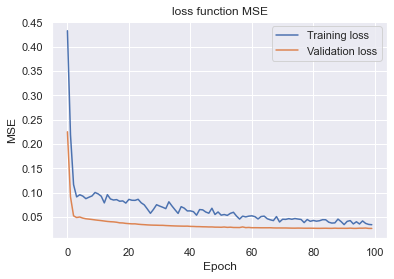

In [16]:
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

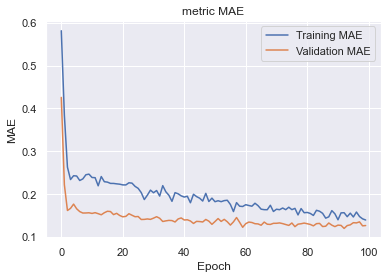

In [17]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

**Perhatikan kedua grafik di atas**. Kita dapat lihat kurang lebih pada epoch ke 40 nilai loss function dan metric sudah cukup stabil. sehingga sebenarnya kita cukup menentukan **epochs = 40**

## Early Stopping

**Bagaimana menentukan nilai epochs?**

### Perhatikan gambar berikut!

<img src="images/Early-stopping-method.png" width="600"/>

- Training seharusnya dihentikan saat epoch berada pada garis optimal seperti gambar di atas. Yaitu ketika nilai loss function pada data validasi mulai naik (sebelum terjadi overfitting) ataupun bisa juga ketika nilainya cukup stabil seperti pada kasus model kita.
- Hal tersebut dapat dilakukan dengan menambahkan Early Stopping yang memiliki parameter sebagai berikut:
1. monitor: nilai yang diamati, biasanya adalah nilai loss function pada data validasi (bisa juga metric validasi)
2. mode: terdapat 3 mode yaitu "min" (training berhenti ketika nilai yang diamati berhenti turun), "max" (training berhenti ketika nilai yang diamati berhenti naik), dan "auto"
3. min_delta: besarnya selisih mutlak yang tidak dianggap mengalami perbaikan (naik/turun)
4. patience: banyaknya epoch setelah nilai yang diamati tidak mengalami perbaikan
5. verbose: adalah opsi untuk menampilkan epoch ke berapa saat proses training berhenti (0 = silent, 1 = display)

**Mari kita coba membuat model menggunakan Early Stopping dengan parameter-parameter berikut**
- monitor = 'val_loss' (nilai yang diamati adalah loss function pada data validasi)
- mode = "min" (mode "min" karena kita mengharapkan val_loss selalu turun)
- min_delta = 0.01 (ketika val_loss turun kurang dari 0.01 dianggap tidak terjadi penurunan, maka training berhenti)
- patience = 10 (ketika tidak terjadi penurunan, maka training berhenti setelah 10 epoch lagi dilakukan)
- verbose = 1 (menampilkan epoch ke berapa saat proses training berhenti)

In [18]:
# Create model
model = create_model(32,'sigmoid',0.1)

# Early Stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", min_delta = 0.01, patience = 10, verbose = 1)

# fit model
history = model.fit(X_train_scaled,y_train_scaled,
                    epochs=100, batch_size=32,
                    validation_split=0.1, callbacks = [es],
                    verbose=2)

Epoch 1/100
12/12 - 1s - loss: 1.1868 - mae: 1.0387 - val_loss: 0.8217 - val_mae: 0.8772
Epoch 2/100
12/12 - 0s - loss: 0.7357 - mae: 0.7905 - val_loss: 0.4747 - val_mae: 0.6466
Epoch 3/100
12/12 - 0s - loss: 0.4205 - mae: 0.5784 - val_loss: 0.2595 - val_mae: 0.4457
Epoch 4/100
12/12 - 0s - loss: 0.2483 - mae: 0.4097 - val_loss: 0.1434 - val_mae: 0.3074
Epoch 5/100
12/12 - 0s - loss: 0.1624 - mae: 0.3220 - val_loss: 0.0921 - val_mae: 0.2321
Epoch 6/100
12/12 - 0s - loss: 0.1244 - mae: 0.2743 - val_loss: 0.0734 - val_mae: 0.1979
Epoch 7/100
12/12 - 0s - loss: 0.1255 - mae: 0.2769 - val_loss: 0.0688 - val_mae: 0.1905
Epoch 8/100
12/12 - 0s - loss: 0.1148 - mae: 0.2724 - val_loss: 0.0679 - val_mae: 0.1891
Epoch 9/100
12/12 - 0s - loss: 0.1084 - mae: 0.2627 - val_loss: 0.0669 - val_mae: 0.1882
Epoch 10/100
12/12 - 0s - loss: 0.1048 - mae: 0.2521 - val_loss: 0.0659 - val_mae: 0.1870
Epoch 11/100
12/12 - 0s - loss: 0.1153 - mae: 0.2630 - val_loss: 0.0643 - val_mae: 0.1845
Epoch 12/100
12/12 

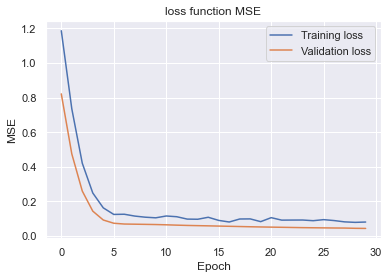

In [19]:
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

## Perhatikan Grafik di Atas!!!
Walaupun kita menetapkan epoch = 100, proses training terhenti pada epoch ke 15 karena kita menggunakan **Early Stopping**

### 5. Evaluasi Model dengan Data Test

- Sebelum melakukan evaluasi model dengan data test, kita akan melakukan prediksi pada data test dengan cara berikut:

`y_pred = model.predict(X_test_scaled)`

- Karena nilai prediksi di atas masih dalam scala MinMaxScaler (scaler2), maka kita perlu membalikkannya menggunakan fungsi inverse_transform() sebagai berikut:

`y_pred = scaler2.inverse_transform(y_pred)`

In [20]:
y_pred = model.predict(X_test_scaled)
y_pred = scaler2.inverse_transform(y_pred)

- Setelah melakukan prediksi barulah kita melakukan evaluasi terhadap nilai prediksi tersebut menggunakan metric yang digunakan yaitu MAE

In [21]:
# Mean Absolute Error (MAE) test data
mae = np.mean(np.abs(y_test-y_pred))
print('MAE data test sebesar:', mae)

MAE data test sebesar: 5.791603111040475


## Apakah Nilai MAE Tersebut Bagus???

**Melihat boxplot dari nilai error mutlak**

<AxesSubplot:>

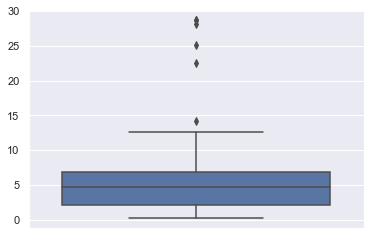

In [22]:
abs_error = np.abs(y_test-y_pred)

sns.boxplot(y = abs_error)

**Melihat range data test**

In [23]:
print('minimum y_test', y_test.min())
print('maksimum y_test', y_test.max())

minimum y_test 8.3
maksimum y_test 50.0


# <center><font color="blue">TensorBoard</font></center> 

- Dalam machine learning, untuk meningkatkan suatu model kita sering kali harus bisa mengukurnya. 
- TensorBoard adalah alat yang menyediakan pengukuran dan visualisasi yang diperlukan dalam proses kerja machine learning.
- Hal ini memungkinkan untuk mengamati eksperimen yang dilakukan seperti loss function dan metric evaluation, memvisualisasikan graf model, memproyeksikan embeddings ke ruang dimensi yang lebih rendah, dan banyak lagi.
- link :https://www.tensorflow.org/tensorboard/get_started

Untuk menggunakan TensorBoard pada model neural network, dapat dilakukan dengan cara berikut

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

from tensorflow.keras.callbacks import TensorBoard
import datetime, os

In [25]:
# Create model
model = create_model(32,'sigmoid',0.1)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y-%m-%d;%H-%M-%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", min_delta = 0.01, patience = 10, verbose = 1)

# fit model
history = model.fit(X_train_scaled,y_train_scaled,
                    epochs=100, batch_size=32,
                    validation_split=0.1, callbacks = [es, tensorboard_callback],
                    verbose=2)

Epoch 1/100
12/12 - 1s - loss: 0.5528 - mae: 0.6929 - val_loss: 0.3510 - val_mae: 0.5572
Epoch 2/100
12/12 - 0s - loss: 0.2831 - mae: 0.4719 - val_loss: 0.1581 - val_mae: 0.3709
Epoch 3/100
12/12 - 0s - loss: 0.1491 - mae: 0.3272 - val_loss: 0.0691 - val_mae: 0.2406
Epoch 4/100
12/12 - 0s - loss: 0.0950 - mae: 0.2404 - val_loss: 0.0406 - val_mae: 0.1706
Epoch 5/100
12/12 - 0s - loss: 0.0632 - mae: 0.1994 - val_loss: 0.0364 - val_mae: 0.1432
Epoch 6/100
12/12 - 0s - loss: 0.0748 - mae: 0.2111 - val_loss: 0.0363 - val_mae: 0.1385
Epoch 7/100
12/12 - 0s - loss: 0.0664 - mae: 0.2044 - val_loss: 0.0359 - val_mae: 0.1418
Epoch 8/100
12/12 - 0s - loss: 0.0687 - mae: 0.2028 - val_loss: 0.0357 - val_mae: 0.1432
Epoch 9/100
12/12 - 0s - loss: 0.0685 - mae: 0.2047 - val_loss: 0.0358 - val_mae: 0.1478
Epoch 10/100
12/12 - 0s - loss: 0.0781 - mae: 0.2103 - val_loss: 0.0354 - val_mae: 0.1467
Epoch 11/100
12/12 - 0s - loss: 0.0730 - mae: 0.2115 - val_loss: 0.0353 - val_mae: 0.1474
Epoch 12/100
12/12 

In [26]:
%tensorboard --logdir=logs

# <center><font color="blue">Hyper-parameter Tuning</font></center> 

## Berapa Banyak Neuron yang Diperlukan? Fungsi Aktivasi Apa yang Harus Digunakan? Berapa Persen Dropout yang Ditentukan?

- Pertanyaan di atas dapat dijawab dengan melakukan hyper-parameter tuning atau melakukan beberapa percobaan dan memilih hasil yang terbaik
- Hyper-parameter tuning dapat lakukan menggunakan fungsi GridSearchCV dari modul sklearn

<img src="images/grid_search.png" width="500"/><br>
- Namun untuk membuat model neural network menggunakan GridSearchCV, kita harus menggunakan fungsi model neural network dan dimasukan ke dalam KerasRegressor
- Selain fungsi model neural network, parameter-parameter yang dimasukan pada model.fit() seperti contoh sebelumnya juga dimasukan ke dalam KerasRegressor

## Membuat Model Neural Network dengan Hyper-parameter Tuning
### 1. Import Modul

In [27]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

### 2. Membuat Model dengan KerasRegressor

In [28]:
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", min_delta = 0.005, patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=500, validation_split=0.1, batch_size=32, callbacks=[es], verbose=0)

### 3. Menentukan parameter-parameter
- Pada contoh ini kita akan melakukan percobaan terhadap jumlah neuron, fungsi aktivasi, dan persentase dropout.
- ketiga parameter tersebut beserta nila-nilai yang ingin digunakan kemudian dimasukan pada variabel **param_grid** dengan tipe data dictionary

In [29]:
# define the grid search parameters
neurons = [32, 64, 128]
activation = ['relu','sigmoid','tanh']
dropout=[0.1, 0.2, 0.3]
param_grid = dict(neurons=neurons, activation=activation, dropout=dropout)

### 4. Membuat Model dengan GridSearchCV
Model dengan GridSearchCV dibuat dengan memasukan beberapa parameter yaitu:
- estimator: model yang ingin dilakukan gridsearch
- param_grid: parameter yang ingin diuji
- n_jobs: Jumlah pekerjaan untuk dijalankan secara paralel. (-1 artinya menggunakan seluruh core processor)
- cv: banyaknya k-fold cross validation

In [30]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

### 5. Training Model dengan GridSearchCV

In [ ]:
grid_result = grid.fit(X_train_scaled, y_train_scaled)

### 6. Memilih Parameter Terbaik

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Dari Hasil Training menggunakan GridSearchCV, kita peroleh:
- parameter terbaiknya adalah: {'activation': 'relu', 'dropout': 0.3, 'neurons': 128}
- Rata-rata Loss Function dari hasil Cross Validation adalah 0.047091 

- Model terbaik dari hasil GridSearchCV kita masukan ke dalam variabel best_model dengan cara 

`best_model = grid_result.best_estimator_.model` 

- Kemudian coba kita lihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model terbaik kita dengan cara sebagai berikut

In [ ]:
best_model = grid_result.best_estimator_.model
history = best_model.history

In [ ]:
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

### 7. Evaluasi Model dengan Data Test
Dengan cara yang sama seperti pada contoh sebelumnya kita akan menghitung MAE pada data test.

In [ ]:
y_pred = best_model.predict(X_test_scaled)
y_pred = scaler2.inverse_transform(y_pred)

abs_error = np.abs(y_test-y_pred)

# Mean Absolute Error (MAE) test data
mae = np.mean(abs_error)
print('MAE data test sebesar:', mae)

sns.boxplot(y = abs_error)

## Apakah Nilai MAE Tersebut Lebih Bagus dari Sebelumnya???

## Membandingkan Nilai MAE dari Hasil Regresi Linear

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

abs_error = np.abs(y_test-reg_pred)

# Mean Absolute Error (MAE) test data dari model regresi
mae = np.mean(abs_error)
print('MAE data test sebesar:', mae)

sns.boxplot(y = abs_error)

# <center><font color="blue">Latihan</font></center>

## Dengan menggunakan data konsumsi energi tiap rumah di atas, buatlah model neural network untuk memprediksi kolom listrik berdasarkan input kolom luas_bangunan dengan ketentuan sebagai berikut!

1. Arsitektur neural network terdiri dari:
- Input layer, hidden layer (Dense layer, Dropout, Dense layer), Dense ouput layer
- Fungsi aktivasi yang digunakan pada kedua Dense layer adalah 'ReLu'
- Persentase Dropout yang digunakan 10%
- Compiler: loss='mse', optimizer='adam', metrics=['mae']

2. Model dibuat menggunakan GridSearchCV dengan paramater yang diuji:
- banyaknya neuron pada Dense layer pertama = [16,32,64]
- banyaknya neuron pada Dense layer kedua = [10,20,30]

3. Early Stopping diterapkan sehingga training berhenti pada saat epoch yang optimal

4. Lakukan evaluasi pada data test dan simpulkan hasil evaluasi tersebut

# <center><font color="blue"> Akhir Modul 13 Introduction to Network Model and Tensorflow</font></center>

<hr />
<img alt="" src="images/meme-cartoon/meme tensors flow node to node.jpeg" style="height: 400px;"/>